Bayangin kalian lagi narik kotak dan ada yang narik berlawanan kayak gini 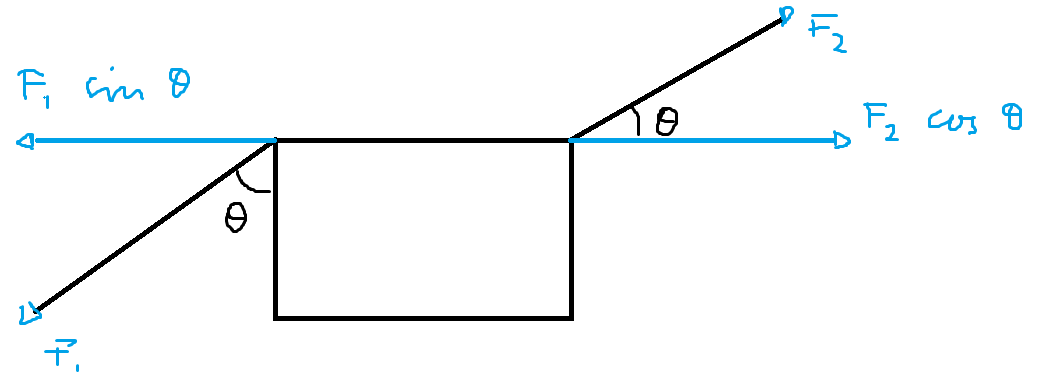

Andaikan kotakya hanya dapat bergerak di sumbu-x, kita cuma mau tau dengan sudut apa kotaknya tidak akan bergerak di sumbu-x. Misal $F_1 = 30 \,\mathrm{N}$ dan Misal $F_2 = 10 \,\mathrm{N}$, berapa $\theta$ agar $\Sigma F_x = 0$?

Kalau kita coba selesaikan secara analitik

$$30\sin{\theta} = 10\cos{\theta}$$

$$tan{\theta} = \frac{1}{3},\, \theta = 18.43^\circ$$

Hoh, dalam ekspektasiku lebih sulit buat diselesain... Tapi andaikan aja kita gak bisa ngitung arctan buat dapetin theta.

Ada cara pencarian akar atau root finding yang bisa kita pakai untuk nyelesain permasalahan di atas. Sudah tau kan pencarian akar tuh yang gimana? Pas disuruh cari sesuatu sama dengan 0. Dari persoalan di atas, kita bisa tulis ulang menjadi

$$30\sin{\theta} - 10\cos{\theta} = 0$$

Kita langsung aja ke metode pertama, yaitu bisection. 
1. Di sini kita ambil dua titik, a dan b, yang kita akan sebut sebagai bracket dan diantara titik a dan b itu ada akar yang kita ingin cari. 
1. Ambil rata-rata dari a dan b yang akan kita namakan c.
1. Kita cari tahu apa akarnya berada di dalam a dan c atau b dan c, caranya adalah dengan menghitung $f(a)\times f(c)$ dan $f(b)\times f(c)$. Yang hasilnya negatif berarti letak akarnya berada diantara kedua angka tersebut.
1. Step di atas diulang sampai mendapatkan akarnya.


In [ ]:
from math import sin, cos

def f(x):
    return 30*sin(x) - 10*cos(x)

a = 0
b = 1

for i in range(5):
    c = (a+b)/2
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

print(c)

0.34375


Kita bisa loop sampai banyak kali hingga menemukan akarnya, tapi kan kurang efektif. Di sini aku akan nunjukin cara untuk bisa stop otomatis kalau memang dikira mencapai akarnya.

Kita akan lihat perubahan angka dari yang lama dan baru, kalau gak terlalu gede berarti sudah dekat dengan hasil yang kita inginkan. Pakai rumus

$$\mathrm{err} = \left|\frac{c-c_{\mathrm{lama}}}{c}\right|$$

In [ ]:
def f(x):
    return 30*sin(x) - 10*cos(x)

a = 0
b = 1
clama = 1000
error = 100

while error > 1/100:
    c = (a+b)/2
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    
    error = abs((c-clama)/c)
    clama = c

print(c)

0.322265625


Sebelum lanjut ke metode selanjutnya, mau kasih fun note aja yang aku baru sadari kalau dengan metode di atas, pasti salah satu dari $f(a)*f(c)$ atau $f(b)*f(c)$ hasilnya negatif. Selain dari itu, hasil keduanya pasti 0. Kalian bisa coba sendiri kalau angka c ternyata memang akarnya.

Metode selanjutnya adalah Regula Falsi, di sini angka barunya tidak diambil dari rata-rata kedua angka yang dipilih, tapi dengan mentarik garis dan mencari di mana garis tersebut berpotongan dengan y = 0. Tempat garis berpotongan itu yang akan menjadi c barunya. Rumusnya adalah seperti ini

$$c = a - \frac{f(a)(a-b)}{f(a)-f(b)}$$

In [ ]:
def f(x):
    return 30*sin(x) - 10*cos(x)

a = 0
b = 1
clama = 1000
error = 100

while error > 1/100:
    c = a - (f(a)*(a-b))/(f(a) - f(b))
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    
    error = abs((c-clama)/c)
    clama = c

print(c)

0.3217505609303644


Apa bedanya sama metode sebelumnya kalau hasilnya sama aja? Kita coba liat berapa banyak perulangan yang diperlukan masing-masing metode

In [ ]:
def f(x):
    return 30*sin(x) - 10*cos(x)

a = 0
b = 1
clama = 1000
error = 100
i = 0

while error > 1/100:
    c = (a+b)/2
    i += 1
    

    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    
    error = abs((c-clama)/c)
    clama = c

print(i)
print(c)

9
0.322265625


In [ ]:
def f(x):
    return 30*sin(x) - 10*cos(x)

a = 0
b = 1
clama = 1000
error = 100
i = 0

while error > 1/100:
    i += 1
    
    c = a - (f(a)*(a-b))/(f(a) - f(b))
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c
    
    error = abs((c-clama)/c)
    clama = c

print(i)
print(c)

3
0.3217505609303644


Kita bisa lihat, regula falsi mendapatkan hasilnya cuma dalam 3 perulangan dan hasilnya lebih akurat dibandingkan yang bisection.

Sampai saat ini kita ngeliat kalau untuk mencari akar kita perlu 2 titik. Ada gak cara yang bisa mencari akar cuma dengan 1 titik random aja? Di sini datang metode Newton Rhapson. Tadi pakai metode regula falsi kita sudah ngeliat cara tarik garis dengan 2 titik, kita juga bisa ngelakuin tarik garis itu dengan 1 titik aja. Karena turunan itu sama dengan kemiringan atau gradien dan hanya memerlukan satu titik, kita bisa buat persamaan seperti ini

$$c = a - \frac{f(a)}{f'(a)}$$

In [ ]:
def f(x):
    return 30*sin(x) - 10*cos(x)

def fd(x):
    return 30*cos(x) + 10*sin(x)

a = 0
clama = 1000
error = 100
i = 0

while error > 1/100:
    i += 1
    
    c = a - f(a)/fd(a)
    
    error = abs((c-clama)/c)
    clama = c
    a = c

print(i)
print(c)

3
0.3217505543966422


Kita dapat hasil yang sama dan dalam jumlah perulangan yang sama dengan Regula Falsi. Tapi, kita tau kalau sin dan cos itu adalah fungsi yang siklik, berarti dalam fungsi ini ada lebih dari 1 akar. Kalau kita taro titik kita misanya di a = 3, kita akan mendapatkan hasil yang berbeda. Bisa coba plot grafiknya biar bisa tau sendiri

In [ ]:
def f(x):
    return 30*sin(x) - 10*cos(x)

def fd(x):
    return 30*cos(x) + 10*sin(x)

a = 3
clama = 1000
error = 100
i = 0

while error > 1/100:
    i += 1
    
    c = a - f(a)/fd(a)
    
    error = abs((c-clama)/c)
    clama = c
    a = c

print(i)
print(c)

3
3.4633432079864366


Yang terakhir yang mau kucontohin itu adalah metode Secant, ini pencarian akar dengan dua titik, tapi tidak seperti metode bracket seperti bisection dan regula falsi, dua titik ini sembarang dan tidak perlu mengetahui kalau ada akar diantaranya. Tidak perlu tau turunan dari fungsinya juga yang berguna di beberapa kasus. Ini juga metode yang sering aku pakai soalnya aku kadang males nurunin fungsi haha.

Metode ini mirip dengan Newton-Rhapson dengan cara menarik garis dengan 2 titik sembarang yang kita pilih. 

$$c = b - \frac{f(b)(b-a)}{f(b)-f(a)}$$

Wait... bukannya ini rumus Regula Falsi? Benar kalau kalian berpikir seperti itu karena memang sama, bedanya adalah gimana kita pakai angka c nya. Kalau sebelumnya kita cari tau kalau akarnya antara a dan c atau b dan c, sekarang kita tukar b menjadi a dan c menjadi b.

In [ ]:
def f(x):
    return 30*sin(x) - 10*cos(x)

a = 0
b = 1
clama = 1000
error = 100
i = 0

while error > 1/100:
    i += 1
    
    c = b - f(b)*(b-a)/(f(b) - f(a))
    
    error = abs((c-clama)/c)
    clama = c
    a = c

print(i)
print(c)

3
0.32183989548469893
